# hepatitis classification - live or die

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# read the file and look at the head and tail
df = pd.read_csv('Data/hepatitis/hepatitis.csv')
df.head(-5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,31,female,False,False,True,False,False,True,False,False,False,False,False,1.2,75.0,173.0,4.2,54.0,True,live
146,41,female,True,False,True,False,False,True,True,True,True,False,True,4.2,65.0,120.0,3.4,NaN,True,die
147,70,female,False,False,True,True,True,NaN,NaN,NaN,NaN,NaN,NaN,1.7,109.0,528.0,2.8,35.0,True,die
148,20,female,False,False,False,False,False,True,NaN,False,False,False,False,0.9,89.0,152.0,4.0,NaN,True,live


In [16]:
# how much of what type?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
age                155 non-null int64
steroid            154 non-null object
antivirals         155 non-null bool
fatigue            154 non-null object
malaise            154 non-null object
anorexia           154 non-null object
liver_big          145 non-null object
liver_firm         144 non-null object
spleen_palpable    150 non-null object
spiders            150 non-null object
ascites            150 non-null object
varices            150 non-null object
bilirubin          149 non-null float64
alk_phosphate      126 non-null float64
sgot               151 non-null float64
albumin            139 non-null float64
protime            88 non-null float64
histology          155 non-null bool
class              155 non-null object
outcome            155 non-null int32
dtypes: bool(2), float64(5), int32(1), int64(1), object(11)
memory usage: 21.6+ KB


In [17]:
# what's the distribution of numeric data?
df.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime,outcome
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000,155.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273,0.793548
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244,0.406070
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000,1.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000,1.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000,1.000000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000,1.000000


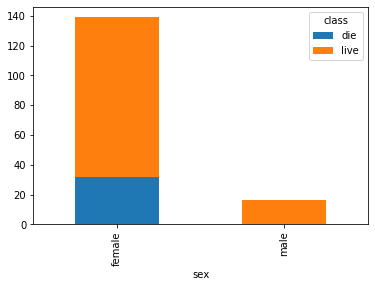

In [13]:
pd.crosstab(df['sex'], df['class']).plot(kind='bar',stacked=True)

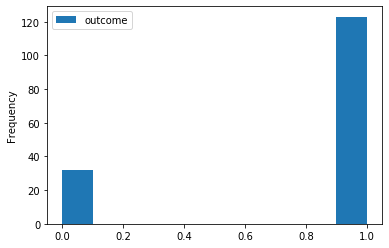

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['outcome'] = labelencoder.fit_transform(df['class'])

df.plot(y='outcome', kind='hist')
plt.show()

In [15]:
# gender not relevant
df = df.drop('sex',1)
df

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,outcome
0,30,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live,1
1,50,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live,1
2,78,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live,1
3,31,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live,1
4,34,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die,0
151,44,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live,1
152,61,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live,1
153,53,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live,1


In [5]:
# look at missing data
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data #.head(5)

,Total,%
protime,67,43.2
alk_phosphate,29,18.7
albumin,16,10.3
liver_firm,11,7.1
liver_big,10,6.5
bilirubin,6,3.9
spiders,5,3.2
varices,5,3.2
ascites,5,3.2
spleen_palpable,5,3.2


C:\Users\joeba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\joeba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([18.,  6., 17.,  6., 10.,  8., 12., 10., 10.,  4.,  4.,  3.,  2.,
         4.,  0.,  2.,  4.,  2.,  0.,  2.,  3.,  3.,  3.,  1.,  0.,  1.,
         2.,  0.,  0.,  1.,  0.,  0.,  0.,  3.,  1.,  2.,  0.,  1.,  0.,
         0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 14.  ,  20.34,  26.68,  33.02,  39.36,  45.7 ,  52.04,  58.38,
         64.72,  71.06,  77.4 ,  83.74,  90.08,  96.42, 102.76, 109.1 ,
        115.44, 121.78, 128.12, 134.46, 140.8 , 147.14, 153.48, 159.82,
        166.16, 172.5 , 178.84, 185.18, 191.52, 197.86, 204.2 , 210.54,
        216.88, 223.22, 229.56, 235.9 , 242.24, 248.58, 254.92, 261.26,
        267.6 , 273.94, 280.28, 286.62, 292.96, 299.3 , 305.64, 311.98,
  

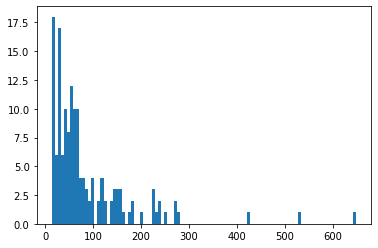

In [6]:
plt.hist(df['sgot'], bins=100)

In [7]:
# look at the patient for whom 'fatigue' is missing - oops, looks like a LOT is missing
df[df['sgot'].isna()]

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
6,51,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
56,34,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,live
118,61,False,False,True,True,False,NaN,NaN,False,True,False,False,NaN,NaN,NaN,NaN,NaN,True,die


In [8]:
df.isnull().sum(axis=1)

0      1
1      1
2      1
3      1
4      2
      ..
150    1
151    1
152    1
153    0
154    0
Length: 155, dtype: int64